# Reinforcement Learning


## Introduction 

Reinforcement Learning focuses on situations where we want to learn to perform the correct action in a given environment, but where the complexity of the environment is just too great for us to hope to enumerate a comprehensive set of training data as we would in Supervised Learning. The "environment" is a situation or configuration of variables that describe our current state. This environment could be a physical environment, a virtual environment, or it could just be a set of variables or features. 

To guide the learning process we usually take advantage of some type of reward. The reward can be positive or negative and during training is available to tell us if an action we select is useful in achieving our goals. 

What makes this problem far more complex is that we may not have a clearly easily defined reward for every action we take in the environment at a given point in time. Instead the reward might only be observable after a sequence of actions is complete. We can't just associate the reward with the final action. Instead we need to be able to distribute that reward back across the earlier actions in the sequence. (While this idea sounds a little bit like back-propagation, keep in mind that this reward distribution is a very different process that exists independently of neural networks). Therefore when we learn to make an action at time T, we are typically doing this not for a greedy reward at time T, but for some reward that is only available to us from some time in the future. 

As an abstract illustration of this, think about studying. An evening of study can be a boring and tiring event. The reward for us doing this now, i.e., at time T, is not very apparent. Instead we might need to look all the way forward to some promotion in work, or the smile on someone's face at graduation, to imagine what the reward might be. We select our action based not on a greedy view of now, but partly on some portion of the future reward. 

Unfortunately, we can't even assume that the an optimum policy for deciding on what action to take will always lead to us to a successful outcome. In the real world there are almost random occurrences and things we can't control that can derail our best laid plans. Therefore our policies need to do their best to account for such environmental changes when we don't known exactly what those changes will be. For example, we sit down to study for the eventing (good plan), but just as we do it, the power is cut, or a friend text's us and tells us about a party your absolutely have to go to. In this case we selected an appropriate action, i.e., study, but the environment changed and the immediate state change that we expected from selecting a particular action is not actually going to come to fruition. 

Turning to more computational examples, we might want to use reinforcement learning when learning to play games, or learning what to say in a given situation. In both these circumstances the number of different situations we can be in are huge, the range of actions we can perform is often very large, and importantly the ultimate goal of the activity is not going to be experienced until many steps in the future -- and is subject to circumstances that we can't fully control. 

### Contrast with Supervised Learning

For any student starting with Reinforcement Learning, a common questions is whether Reinforcement Learning is an example of Supervised or Unsupervised Learning. In practice it is easiest to think about Reinforcement Learning as its own thing. While it shares some features with Supervised Learning, the methods of training and lack of training samples make it something quite different from Supervised Learning. 

In supervised learning the complexity of the environment relative to the range of target labels is usually small enough to learn a mapping between environment and target explicitly, in Reinforcement Learning we don't have a chance of learning that mapping in a static way. 

What we do instead is try performing the best possible action as far as we understand things so far, we then find out the consequence of the action - i.e., whether it was good or bad - and then adjust our action selection policy based on that result. For Supervised Learning we don't need to worry about the future -- we are only ever making the best possible prediction for now with no interference from future considerations. 

### How do we train in practice

Since we can't collect a set of labeled training data, instead we need to learn to make our decisions based on experience. The question then becomes, how do we gain this experience? 

For games and game like environments, the answer is easy. We can play the games multiple times and learn from our mistakes. This is exactly analogous to how people actually play games and learn to beat the system. Better still, we don't necessarily have to play the games in real time. Since we are training computational systems we can speed up the game play. This ability to speed up the game play for training is important, because, as we will see later, Reinforcement Learning needs a lot of iterations to achieve good results. 

If we are learning to perform actions in a real environment -- for example physical actions for a robot or spoken actions for a dialogue system -- we need to be able to map our real environment to some sort of simulation for training. Again, once we have this simulation we can usually speed up the simulation to assist in training. While building a simulation is usually straightforward, the challenge for this type of real-world oriented task is to design a suitable mechanism that can give us a reward after every action. Designing this 'oracle' that can give us the reward during training is often one of the toughest tasks in putting reinforcement learning to work. 

### (Deep?) Reinforcement Learning 

In this lecture series we are primarily focused on Deep Reinforcement Learning, i.e., Reinforcement Learning executed in a Deep Learning framework. However it is worth keeping in mind that Reinforcement Learning has a history that goes back long before Deep Learning -- this is similar to how Supervised Learning exists as a domain that is much bigger than Deep learning based Supervised Learning. 

With this in mind, we will begin this lecture by looking at Q-Learning -- a classical approach to Reinforcement Learning. We will use that to illustrate the ideas underpinning Reinforcement Learning, and then go on to show how in can be re-cast as a Deep Learning problem. 

These notes are based on a number of on-line tutorials for Deep Reinforcement Learning. Below I have links to the source materials. In most cases I have changed the code used slightly -- usually just to make things a little bit more detailed so that you don't have to try to spend so long figuring out what is going on. 

https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0
https://gym.openai.com/envs/FrozenLake-v0/
https://github.com/streklin/learnAIGymAtari/wiki


# A Game: FROZEN LAKE 

To illustrate the ideas behind Reinforcement Learning we will make use of a very simple text game environment. The game is called Frozen-Lake-V0. For more information on the game, let's quote from the game page which was referenced above. 

> Winter is here. You and your friends were tossing around a frisbee at the park when you made a wild throw that left the frisbee out in the middle of the lake. The water is mostly frozen, but there are a few holes where the ice has melted. If you step into one of those holes, you'll fall into the freezing water. At this time, there's an international frisbee shortage, so it's absolutely imperative that you navigate across the lake and retrieve the disc. However, the ice is slippery, so you won't always move in the direction you intend.

For our Frozen Lake we will assume a 4x4 grid environment where every cell is a space on the frozen lake. The cells can be one of four types: (S) a start cell where we set off from, (G) a goal cell where the frisbee is located, (F) a frozen cell that is safe to move on to, and (H) a hole cell that will cause is to fall into the icy water. The specific layout generated by default is given below: 

| |Column 1 | Column 2 | Column 3 | Column 4 |
|-|-|-|-|-|
|Row 1 |S|F|F|F|
|Row 2 |F|H|F|H|
|Row 3 |F|F|F|H|
|Row 4 |H|F|F|G|

We can give each of these cells numbered labels for easy reference:

| |Column 1 | Column 2 | Column 3 | Column 4 |
|-|-|-|-|-|
|Row 1 |S-0|F-1|F-2|F-3|
|Row 2 |F-4|H-5|F-6|H-7|
|Row 3 |F-8|F-9|F-10|H-11|
|Row 4 |H-12|F-13|F-14|G-15|

Looking at the problem this way, we want to get from cell 0 to cell 15 without moving through cells 5, 7, 11 or 12. 

The agent has four actions available to it, these correspond to moving LEFT, RIGHT, UP, or DOWN. Only one cell at a time can be moved to. Internally the game 'engine' encodes these four moves as integers as per the list below: 

* LEFT = 0
* DOWN = 1
* RIGHT = 2
* UP = 3

The final thing to note is that the actions we make are not always guaranteed to work out as we expect them. From a game play perspective we can think of the Frozen Lake environment as being slippery, and that even when we plan to say move DOWN there is no guarantee that this is what will happen. Instead we might slip off in a different direction. This means that it is impossible for us to learn to play the game perfectly and that the best action to take might not always correspond to our initial intuition. 

The slippery movement algorithm for Frozen Lake means that (when thinking from the game character's perspective) if we try to move "forward", we might end up moving forward, left, or right with equal probability. We won't end up moving backward. Keep in mind also that we aren't allowed to walk off the edges -- though aw we will see later, that doesn't stop us trying.  

## Approach 1: Random Walk

Before we look at the Q-Learning algorithm in detail, lets try to play a simplified from of the game with a random walk strategy. In other words, at any give point on the lake we might randomly decide to walk in any of the four directions. We'll disable the slippery nature of the walk for now for illustration. 

As we might expect it is going to be tough to complete the game in this way. As a record of our success we will count the occasions that we complete the course out of a long sequence of game 'episodes'. 

Lets being by importing the libraries that we need. In addition to some usual libraries, we also import 'gym' which is a library that contains the Frozen Lake game implementation and an API to control it. 

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from gym.envs.registration import register
register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False},
    max_episode_steps=100,
    reward_threshold=0.78, # optimum = .8196
)

frozen_env = gym.make('FrozenLakeNotSlippery-v0')

Rather than using the standard form of the game, we created our own variant that has the slippery property turned off. Once we have designed that game variant, we created an instance of the game and note how many episodes of the game we want to play. 

Finally, let's set up the code to create the game. We will have two loops. The outer loop controls the number of game instances that we play -- we will refer to these as episodes. The inner loop controls the maximum number of steps we can take per game episode. We will always execute all episodes of the game. But for the inner loop, we can leave the loop early if we either win (reach the goal state) or fail (fall into a hole). 

We are going to take an Object Oriented approach to our design to make it easier to experiment and change things later. 

In [ ]:
from abc import ABC, abstractmethod

class FrozenLakeFramework(ABC):
    """Learning Framework for Frozen Lake"""
    
    def __init__(self, env, num_episodes):
        self.env = env
        self.num_episodes = num_episodes
        # set up list for recording game logs, wins, and steps per game
        self.logs = []
        self.wins = []
        self.steps = []
        super().__init__()
        
    @abstractmethod
    def selectAction(self,j,s,i):
        pass        
                   
    def updatePolicy(self,s,a,r,s1):
        """
        Update the selection policy. Does nothing by default but is not abstract. 

        Parameters: 
        s (int): current state
        a (int): action selected
        r (int): reward for the state-action pair. 
        s1 (int): the state we moved to after performing a. 
        """
        return
    
    def archive(self,i):
        """
        At the end of a game play, archive any information necessary for diagnostics. 
        
        Default version does nothing. Note that this isn't part of the learning algorithm, 
        it is just producing records for debugging. 
        """
        return 0         
        
    def playFrozenLake(self,gen_logs=True):
        """
        Execute a training session for Frozen Lake and print out the results. 
        
        The main function takes care of training and records a lot of information to return to us for visualisation and debugging purposes. 

        Parameters: 
        gen_logs (binary): Indicate whether logs of runs should be generated and returned. Defaults to True.

        """
        # Iterate through all episodes of game play
        for i in range(self.num_episodes):
            if i % 100 == 0: print(str(i)+", ",end = '')
            # Reset environment and get first state
            s = self.env.reset()
            # make sure done flag is set to false and reward is 0
            done, reward = False, 0
            # create list to record trace of this game episode
            trace = []
            for j in range(100):
                # select an action to perform
                action = self.selectAction(j,s,i)
                # apply action and get new state, reward and done flag from enviroment 
                s1,reward,done,_ = self.env.step(action)
                # Update the action selection policy
                self.updatePolicy(s,action,reward,s1)
                # record the current state transition tuple -- used for printing and reviewing 
                trace.append([s,action,s1,reward,done])
                # new state becomes current state
                s = s1
                # if we are done we exit the loop
                if done == True: 
                    break
            # Clean up information after training loop 
            if gen_logs == True: 
                self.logs.append(trace)

            # if we won - record win and number of steps required, else record loss. 
            self.wins.append(reward)
            self.steps.append(j)

            # call for any custom archiving 
            self.archive(i) 
        
        return
    
    def preTrain(self,num_pre_train_episodes):
        """
        Perform Pre-Training. We will use the model to
        
        The main function takes care of training and records a lot of information to return to us for visualisation and debugging purposes. 

        Parameters: 
        gen_logs (binary): Indicate whether logs of runs should be generated and returned. Defaults to True.

        """
        # Iterate through all episodes of game play
        for i in range(self.num_pre_train_episodes):
            # Reset environment and get first state
            s = self.env.reset()
            # make sure done flag is set to false and reward is 0
            done, reward = False, 0
            for j in range(100):
                # select an action to perform
                action = self.selectAction(j,s,i)
                # apply action and get new state, reward and done flag from enviroment 
                s1,reward,done,_ = self.env.step(action)
                # Update the action selection policy
                self.updatePolicy(s,action,reward,s1)
                # new state becomes current state
                s = s1
                # if we are done we exit the loop
                if done == True: 
                    break
        
        return
        
    def test(self,episodes):
        """
        Execute a testing session for Frozen Lake and print out the results. 
        
        This is basically the same as training, but we don't train. 

        Parameters: 
        gen_logs (binary): Indicate whether logs of runs should be generated and returned. Defaults to True.

        """    
        # Iterate through all episodes of game play
        r = 0 
        for i in range(episodes):
            # Reset environment and get first state
            s = self.env.reset()
            # make sure done flag is set to false and reward is 0
            done, reward = False, 0
            for j in range(100):
                # select an action to perform
                action = self.selectAction(j,s,i)
                # apply action and get new state, reward and done flag from enviroment 
                s1,reward,done,_ = self.env.step(action)
                # new state becomes current state
                s = s1
                # if we are done we exit the loop
                if done == True: 
                    break

            # if we won - record win and number of steps required, else record loss. 
            r += reward

        return (r / episodes) * 100
    
    def printLogs(self,max_n):
        """Print up to max_n number of episode entries from logs."""
        if(max_n > len(self.logs)):
            max_n = len(self.logs)

        for i in range(max_n):
            print("Printing " + str(i))
            l = self.logs[i]
            for j in range(len(l)):
                step = l[j]
                print("S: " + str(step[0]) + ", a: " + str(step[1]) + ", s1: " + str(step[2])  + ", r: " + str(step[3])   + ", d: " + str(step[4]))
    
    def printResults(self,plot=True,l=0):
        if l > 0: 
            printLogs(self.l)

        if plot:
            plt.plot(self.wins)
            plt.title('Wins against number of episodes. Every spike was a win.')    
        
        return 

Now that we have the basic abstract class for our game, lets instantiate it for the RandomWalk case. 

To make things easier for later we have split out the selection of an action into its own function. We do this with argmax. This might seem like overkill for now, but will be useful later. Also note that we aren't using the variables j or s yet, but we will update this function later and it is useful to have the function signature in place now. We will also create a function for updating our selection policy. For the moment we don't have anything to update since we are selecting randomly, but it is useful to have this defined as a placeholder for later. 

In [ ]:
class RandomFL(FrozenLakeFramework):
    """Random Walk based approach to Frozen Lake"""
    
    def __init__(self, env, num_episodes):
        FrozenLakeFramework.__init__(self,env,num_episodes)
        
    def selectAction(self,j,s,i):
        """
        Randomly select an action to return. 

        Parameters: 
        j (int): number of steps taken in the game 
        s (int): current state of the game
        i (int): training episode number

        Returns: 
        int: indicates the next action to be performed. 
        """
        return np.argmax(np.random.randn(1,self.env.action_space.n))       

Lets define the number of training episodes and start training. 

0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 
Test results:         1.40


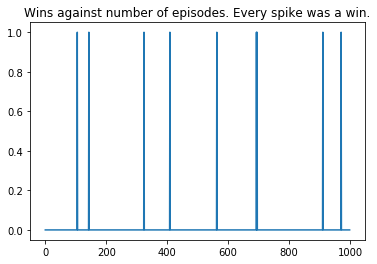

In [ ]:
game = RandomFL(frozen_env,1000)
game.playFrozenLake()
game.printResults()
print("\nTest results: % 12.2f" % game.test(500))

The outputs you get will depend on when you run the code, but here are the outputs from a specific run for reference:

```python
Number of Logs: 5
S: 0, a: 1, s1: 4, r: 0.0, d: False
S: 4, a: 1, s1: 8, r: 0.0, d: False
S: 8, a: 0, s1: 8, r: 0.0, d: False
S: 8, a: 2, s1: 9, r: 0.0, d: False
S: 9, a: 2, s1: 10, r: 0.0, d: False
S: 10, a: 1, s1: 14, r: 0.0, d: False
S: 14, a: 1, s1: 14, r: 0.0, d: False
S: 14, a: 1, s1: 14, r: 0.0, d: False
S: 14, a: 2, s1: 15, r: 1.0, d: True
Percentages of Wins: 1.0%
Number of steps that were required for each win: [8, 11, 10, 15, 8]
```

![image.png](attachment:image.png)

Here we see that the state sequence for this win was 0, 4, 8, 9, 10, 14, 15 -- though it is worth noting that we got stuck at state 8 and 14 for multiple steps.

For that run there were 5 wins out of 500 -- representing a 1% chance of making it to the end of the route. 

### Getting Slippery 
In the real world the successful outcome of an action is often subject to chance. To model this, let's re-run things with the true version of the Frozen Lake game. Remember, in this version we aren't guaranteed that a command to move forward is definitely going to move us forward -- there is a chance we slip and move to a different square. 

Let's load up the environment and play the game with the random action selection mechanism. 

0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 
Test results:         1.60


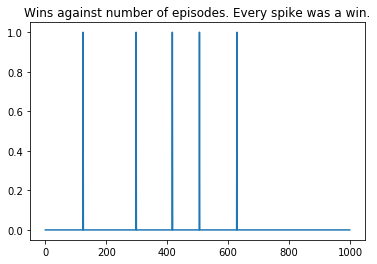

In [ ]:
# let's get the real FrozenLake game - slippery by default
slippery_frozen_env = gym.make('FrozenLake-v0')
game = RandomFL(slippery_frozen_env,1000)
game.playFrozenLake()
game.printResults()
print("\nTest results: % 12.2f" % game.test(500))

If you play the game, you should notice two things. First, when you look at the trace displayed for the game you will see that the actions (1,2,3,4) do not always have the effect that you expect them to. If we dig into the code of the Frozen Lake world we discover that the frozen model, isn't just a little slippery, but a lot slippery. Specifically in whichever direction we aim to move, there is an equal chance that we could rotate to the left or the right relative to the direction in which we wanted to move. In other words, if we aim to move up, there, we have a 1/3 chance of moving up, left or right. If we aim to move right, we could end up turning up, right, or down with equal probability. We will see this randomness in the traces we printed. 

Second, the overall success is not particularly better or worse than in our first attempt to play the game. This should be unsurprising as the slippery property does not change the fact that every step we take is basically random. 

## Approach 2: Hand Crafted Policy

Rather than taking a random walk, we could hand craft a policy for this specific scenario. Our hand crafted policy should define an action to be taken at each of our available states. While we have 16 states in total, we know that the game should not allow us to take actions if we enter a hole or goal state (victory laps are not possible). Therefore a policy to map an action to each of our 16 states (in the case of a non-slippery environment) might look like this:

|        | Left | Down | Right | Up |
|-|-|-|-|-|
|State 0  | 0.0 | 1.0 | 1.0 | 0.0 |
|State 1  | 0.5 | 0.0 | 1.0 | 0.0 |
|State 2  | 0.5 | 1.0 | 0.5 | 0.0 |
|State 3  | 1.0 | 0.0 | 0.0 | 0.0 |
|State 4  | 0.0 | 1.0 | 0.0 | 0.5 |
|State 5  | 0.0 | 0.0 | 0.0 | 0.0 |
|State 6  | 0.0 | 1.0 | 0.0 | 0.5 |
|State 7  | 0.0 | 0.0 | 0.0 | 0.0 |
|State 8  | 0.0 | 0.0 | 1.0 | 0.5 |
|State 9  | 0.5 | 1.0 | 1.0 | 0.0 |
|State 10 | 0.5 | 1.0 | 0.0 | 0.5 |
|State 11 | 0.0 | 0.0 | 0.0 | 0.0 |
|State 12 | 0.0 | 0.0 | 0.0 | 0.0 |
|State 13 | 0.0 | 0.0 | 1.0 | 0.5 |
|State 14 | 0.5 | 0.0 | 1.0 | 0.0 |
|State 15 | 0.0 | 0.0 | 0.0 | 0.0 |

Here we have assigned a value of 1.0 to any actions that move us positively towards the goal, 0.0 to any actions that will cause a fall or not result in any movement, and 0.5 to any actions that take us backwards. We can code this up as a table and select our actions from this map. Since we are going to be looking at q-learning shortly, we will call this the Q-Table. 

In [ ]:
Q = np.array([
    [0.0, 0.8, 1.0, 0.0],
    [0.5, 0.0, 1.0, 0.0],
    [0.5, 1.0, 0.5, 0.0],
    [1.0, 0.0, 0.0, 0.0], 
    
    [0.0, 1.0, 0.0, 0.5], 
    [0.0, 0.0, 0.0, 0.0],
    [0.0, 1.0, 0.0, 0.5],
    [0.0, 0.0, 0.0, 0.0], 
    
    [0.0, 0.0, 1.0, 0.5],
    [0.5, 1.0, 1.0, 0.0],
    [0.5, 1.0, 0.0, 0.5],
    [0.0, 0.0, 0.0, 0.0],
    
    [0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 0.5], 
    [0.5, 0.0, 1.0, 0.0], 
    [0.0, 0.0, 0.0, 0.0]
])

We also need to redinfe our action selection function to select the most relevant action from our table. 

In [ ]:
class HandCraftedFL(FrozenLakeFramework):
    """Hand Crafted based approach to Frozen Lake"""
    
    def __init__(self, env, num_episodes,Q):
        FrozenLakeFramework.__init__(self,env,num_episodes)
        self.Q = Q

    def selectAction(self,j,s,i):
        """
        Select an action from a Q table. 

        Parameters: 
        env (environment): Instance of the Frozen Lake game enviornment
        j (int): number of steps taken in the game 
        s (int): current state of the game
        i (int): training episode number    

        Returns: 
        int: indicates the next action to be performed. 
        """
        return np.argmax(self.Q[s,:])

Lets reset and play with the deterninistic environment. 

0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 
Test results:       100.00


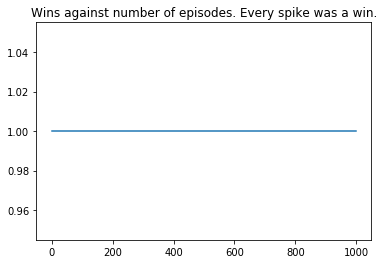

In [ ]:
game = HandCraftedFL(frozen_env,1000,Q)
game.playFrozenLake()
game.printResults()
print("\nTest results: % 12.2f" % game.test(500))

Unsurprisingly we always win -- with an optimum policy that takes only 6 steps to work through the environment. 

#### Application to the Slippery Environment

If we try using the same policy but with the slippery environment, we find that the results aren't very good at all. That is because the slippery environment means that some actions from our optimal policy are now sub-optimal. For example, deciding to move down when in State 6 is a bad idea as there is a more likely chance that we will end up in states 5 or 7 rather than progressing on to state 10 as expected. 

Taking that point into consideration, a better policy might be one like this:

In [ ]:
Q = np.array([
    [1.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 1.0],
    [0.0, 0.0, 0.0, 1.0],
    [0.0, 0.0, 0.0, 1.0], 
    
    [1.0, 0.0, 0.0, 0.0], 
    [0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, 0.0], 
    
    [0.0, 0.0, 0.0, 1.0],
    [0.0, 1.0, 0.0, 0.0],
    [1.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0],
    
    [0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 0.0], 
    [0.0, 0.0, 0.0, 1.0], 
    [0.0, 0.0, 0.0, 0.0]
])

This policy has us always selecting actions that point away from a hole state. A notable exception for this is state 6 where we actively point towards a hole. This is because given the slippery property this actually reduces the chance of falling into a hole relative to if we had decided to use moving up or moving down as the selected action in that state. 

Let's see how this policy actually performs on the slippery environment. 

0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 
Test results:        57.20


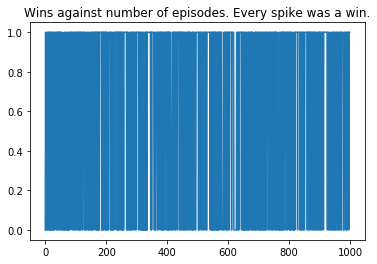

In [ ]:
game = HandCraftedFL(slippery_frozen_env,1000,Q)
game.playFrozenLake()
game.printResults()
print("\nTest results: % 12.2f" % game.test(500))

We can see that the policy certainly did better than chance on the slippery environment -- though performance is still far from perfect as there are several actions we have to take that could lead us to slipping into a hole. We see that a 50-60% chance is our upper bound on what we can expect to get from a policy. 

## Q Learning

In the code above we have used hand crafted policies to illustrate the properties of the world, but what we are really interested in is a way to learn these properties automatically rather than hand crafting them. To do this we will take advantage of the idea of the reward, and use an equation that allows us to have that reward be distributed back to early points in the game -- even though we only ever see the reward at the last step of the game. 

What we need to do is learn the utility of selecting a given action given a specific state. Traditionally we refer to this utility as the "Quality" of an action which we record in a table called the Q-Table. As in the examples above, the Q-Table's rows are the states of the environment, and the columns are the individual actions that are available to our agent. 

Each cell in the table represents the utility of selecting a given action in that state, and importantly the Q-Learning algorithm gives us an elegant way of updating the values in those cells based on our game playing experience. The update equation takes many forms but the most universal is: 

\begin{equation*}
Q(s,a) = (1 - \alpha)Q(s,a) + \alpha(r + \gamma (max(Q(s',a'))))
\end{equation*}

where $Q(s,a)$ is the utility or Q-value of the state action pair $(s,a)$; $\alpha$ is our learning rate; $r$ is the reward picked up at the current point in time; $\gamma$ is the potential influence of Q-values estimates that we have for the next step into the future, finally $max(Q(s',a'))$ defines the maximal Q-value available from our next state $s'$. 

There is a lot to unpack here, so let's take it one element at a time. 

First of all keep in mind that we are making an update to a Q-value for a given state action tuple. The state action tuple are defined as state $s$ action $a$, and the update we make doesn't completely overwrite what was there before. Therefore we can see that the new Q-value for that tuple is influenced in part by the current Q-value. To emphasize the fact that this is an assignment operation, I've used the assignment operator $\leftarrow$ rather than a simple equals sign. 

Since we want to take account of the original value of the Q-value in our assignment, we need some way to balance the influence of the original Q-value versus the new information we are now going to add to it. To control this we make use of a learning rate $\alpha$. We see that the learning rate provides a balance between the influence of the original Q-value and the element we will take from another part in the Q table. When $\alpha$ is high we will pay more attention to the new information. When $\alpha$ is low we will pay most attention to the existing Q-value and only slowly update that value. 

The new information $r + \gamma (max(Q(s',a')))$ has two elements. First we have the potential influence of a reward that we have just received -- this is $r$. Second we have the potential influence of the Q-values from another part of the table. Specifically we can update by the maximum Q-value that is available in $s$ -- the state we transition to next given executing action $a$ in state $s$. Therefore if our current action leads to a state with a high Q-value rather than a low Q-value, our current Q-value will increase by a larger amount. This way positive Q-Values spread back through the network during the training process. The proportion of Q-value we get from the next step is mediated by a factor $\gamma$. 

To illustrate, let's consider the updates we would get in a couple of key state-action pairs in the Frozen Lake environment. For the moment let's assume we are dealing with the non-slippery form of the environment. 

In state 15 (the goal state), we have already won and won't make any further moves. The reward component is 0, and since we will never move out of this state, the second component of the equation will always give us 0s as well -- we aren't going anywhere. Therefore the Q-value update (and hence the Q-value) of all actions in state 15 is always going to be 0. 

How about the case of state-action pairs that lead to state 15. Consider the case of selecting action 2 (move right) while in state 14. In this case we should get a reward of 1, i.e., $r=1$ according to the game rules. There will however be no value for the second component of the Q-value update as when we follow that action we end up in state 15 which we know will always have a Q-value of 0. Therefore our Q-value updates for action 2 in state 14 will always come directly from the reward. The same is true for state 11 action 1. 

Now how about state 10 when we select action 1, i.e., DOWN. Well the reward is always going to be 0, but since we move into state 14 which we know in turn will lead to state 15, there should be some reward. Therefore the q-value for this pair should update with some content over time. 

It is worth keeping in mind that this is an iterative process where rewards flow backwards from state-action pairs (14,2) and (10,1) in our game. 

To code this selection policy up, it is quite simple. First we will reset our Q table to 0s. Then we will define our action selection strategy to select the best action in a given state (subject to a bit of noise). We also redefine our update policy function to make sure that the Q-table gets updated after every run. 

One last thing, it is important to note that the update equation above is not recursive. Our update of the current state is based on the value for a different state that has been computed in a previous step. 

In [ ]:
class QLearningFL(FrozenLakeFramework):
    """Traditional Q-Learning based approach to Frozen Lake"""
    
    def __init__(self, env, num_episodes):
        FrozenLakeFramework.__init__(self,env,num_episodes)
        # Initialize the Q table with all zeros
        self.Q = np.zeros([env.observation_space.n,env.action_space.n])
        self.alpha = 0.8
        self.y = .95

    def selectAction(self,j,s,i):
        """
        Select an action from a Q table. 

        The action we select is due in part to the actual value recorded in the Q table, but 
        also due to a random element that we introduce. The random element is quie high at the 
        start of game play, but it decreases over time. Random selection is very important at the
        start when we have not yet won any games (q-table is all 0s) and need some process to 
        select the actions. But as we move through the game play episodes the influence of this 
        random element reduces. 

        Note that the addition of the random element is vectorised. 

        Parameters: 
        j (int): number of steps taken in the game 
        s (int): current state of the game
        i (int): training episode number

        Returns: 
        int: indicates the next action to be performed. 
        """
        # the influence of random noise will decrease over episodes (i)
        # we will have a random value for eacho the
        a = np.argmax(self.Q[s,:] + np.random.randn(1,self.env.action_space.n)*(1./(i+1)))
        return a

    def updatePolicy(self,s,a,r,s1):
        """
        Update the selection policy. 

        We apply the Q-Learning update policy. 

        Parameters: 
        s (int): current state
        a (int): action selected
        r (int): reward for the state-action pair. 
        s1 (int): the state we moved to after performing a. 
        """

        # Update Q-Table with new knowledge
        self.Q[s,a] = (1-self.alpha)*self.Q[s,a] + self.alpha*(r + self.y*np.max(self.Q[s1,:]))

        return          

With our game defined, we can now run some training.

0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 
Test results:        70.80


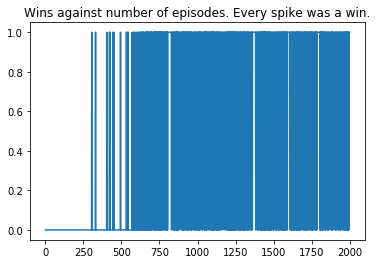

In [ ]:
game = QLearningFL(slippery_frozen_env,2000)
game.playFrozenLake()
game.printResults()
print("\nTest results: % 12.2f" % game.test(500))

Looking at the plot of wins we we see that performance isn't great for the first 200-250 runs. Here and at the start in particular we are effectively randomly selecting actions. Since we have so few wins there is no reward to try to guide our progress -- this is a common problem for scenarios where the reward is only doled out at the end of the game. Nevertheless once we begin making progress we quickly start winning the game in the scenario of situations. Remember that it is impossible to always win due to the slippery nature of the environment. 

Let's have a look at the Q-Table that is produced. Remember that this is for the slippery environment, so the utility of actions in a given state don't necessarily correspond to our initial intuitions. 

In [ ]:
print(game.Q)
print(np.sum(game.Q))

[[1.37044396e-01 4.21732050e-03 1.24419170e-02 7.57252804e-03]
 [8.42677422e-04 2.63297162e-03 8.37997991e-08 1.93520066e-01]
 [0.00000000e+00 1.89531550e-03 5.60884270e-03 5.98452532e-02]
 [1.23086728e-03 2.65264363e-04 8.80458524e-04 5.80250499e-02]
 [1.69623372e-01 5.98102437e-05 3.88915329e-03 7.95295140e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.91909699e-06 3.73728001e-04 6.31498041e-02 4.99610711e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.41661758e-04 4.32738893e-04 9.96542038e-04 3.65713592e-01]
 [8.88143070e-05 1.64112531e-01 3.66623485e-03 3.63990058e-04]
 [7.48765489e-01 0.00000000e+00 1.22645674e-03 2.57738112e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.31930876e-05 0.00000000e+00 7.34316445e-01 1.28319236e-03]
 [0.00000000e+00 9.91657296e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

## Q-Learning with a Neural Network

Now that we have a clear understanding of the Q-Learning process in general, we can sit down and substitute in a neural approach to the learning mechanism. To make this substitution we only need two things: 1. a mechanism to return utility values (and subsequently a selected action) for a given state; and 2. a mechanism to update the utility values based on the experience from applying the selected action to the current state. 

Thinking in deep learning algorithm terms, this should be pretty straightforward. Let's create a network that maps states as the input variable to Q-Values for that state as the output variable. Our input is a one hot encoding of state will hence have dimension [1,16]. Our output meanwhile [1,4] and corresponds to the utility of each of our four possible actions. For this process we don't need a true deep network -- we will simply use one two layers (input and output) that are fully connected but with no bias unit. Since our utilities are real valued, we won't even be bothering with an activation function. 

So far this is very straightforward. We predict utility values for a given state -- this is very similar to what the Q-table itself does for us. Where things get a bit more interesting is where we think about the application of the Bellman equation to update the utility values following some learning. Normally the Bellman equation lets us directly update the utility values for a given state-action pair -- that works for a static lookup table but does not work directly for a functional (neural) approach. Instead what we need to do is figure out a way to adjust the network such that after learning our network provides an updated utility value. 

Backpropagation gives us a mechanism to update our weights based on some loss -- can we use it in this case to update our utility values? The short answer is yes. Backpropagation takes the first order derivative of the loss between some prediction and a 'true' value and passes this back through the network adjusting weights such that our prediction better matches the 'true' value. To apply this to our learning case here we need to think about the loss in different terms. Instead the loss is the difference between our current predicted value and what the value should be after application of the Bellman equation. 

Beyond this conceptual difference in how we think of losses, the application of the neural approach is straightforward -- though more complex to set up than a static Q table. 

To implement the approach, let's begin by importing Tensorflow, setting up a variable to record training time, and then reset our computing graph if we have already been using it. 

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import time 
start_time = time.time()

Instructions for updating:
non-resource variables are not supported in the long term


Next, let's set up the actual graph elements. We have an input layer, weights, and an output layer which is the logit only. We also need a placeholder for our target value (the next Q value) as well as standard operations to compute loss and apply training. 

Next, let's set up our selectAction and updatePolicy functions. For selectAction we just need to apply the state to our variable and get the result. updatePolicy is a little bit more complex than we have dealt with previously. Fundamentally though, it is still achieving the same goal. Since we are running this as a Tensorflow 1 style piece of code, we need to explicitly set up a session before call 

In [ ]:
class NQL(FrozenLakeFramework):
    """Neural (not really Deep) Q-Learning. """
    
    def __init__(self, env, num_episodes,session):
        FrozenLakeFramework.__init__(self,env,num_episodes)
        self.sess = session 
        
        # Construct very simple two layer network
        self.inputs = tf.placeholder(shape=[1,16],dtype=tf.float32)
        self.W = tf.Variable(tf.random_uniform([16,4],0,0.01))
        self.Qout = tf.matmul(self.inputs, self.W)
        self.predict = tf.argmax(self.Qout, 1)

        # construct operations for training 
        self.nextQ = tf.placeholder(shape=[1,4],dtype=tf.float32)
        self.loss = tf.reduce_sum(tf.square(self.nextQ - self.Qout))
        self.trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
        self.updateModel = self.trainer.minimize(self.loss)

        # initialise the operations 
        self.init = tf.initialize_all_variables()
        
        # Next we set up the hyper parameters. 
        self.y = .98
        self.alpha = 0.8
        self.epsilon = 0.1

    def selectAction(self,j,s,i):
        """
        Select an action by running the state s through the network. 

        Parameters: 
        j (int): number of steps taken in the game 
        s (int): current state of the game
        i (int): training episode number

        Returns: 
        int: indicates the next action to be performed. 
        """
        [action, self.Q_] = self.sess.run([self.predict, self.Qout],feed_dict={self.inputs:np.identity(16)[s:s+1]})
        if np.random.rand(1) < self.epsilon:
            a = self.env.action_space.sample()
        else:
            a = action[0]
        return a

    def updatePolicy(self,s,a,r,s1):
        """
        Update the selection by applying backpropogation. 

        Parameters: 
        s (int): current state
        a (int): action selected
        r (int): reward for the state-action pair. 
        s1 (int): the state we moved to after performing a. 
        """
        # Obtain the Q' values by feeding the new state s1 through our network
        Qprime = self.sess.run(self.Qout,feed_dict={self.inputs:np.identity(16)[s1:s1+1]})

        #Obtain maxQ' and set our target value for chosen action.
        maxQprime = np.max(Qprime)

        Q_target = np.copy(self.Q_)
        Q_target[0,a] = (1-self.alpha)*Q_target[0,a] + self.alpha*(r + self.y*maxQprime)    

        #Train our network using target and predicted Q values
        self.sess.run([self.updateModel],feed_dict={self.inputs:np.identity(16)[s:s+1],self.nextQ:Q_target})
        
        return 
    
    def archive(self,i): 
        self.epsilon = 1. / ((i / 50) + 10)
           

In [ ]:
def runTests(runs):
    results = []
    for k in range(runs):
        tf.reset_default_graph()
        with tf.Session() as sess:
            nql = NQL(slippery_frozen_env,2000,sess)
            sess.run(nql.init)
            nql.playFrozenLake()
            nql.printResults(plot=False)
            r = nql.test(500)
            print("\nTest results: % 12.2f" % r)
            results.append(r)
    print(results)
    print(np.mean(results))
    
runTests(10)    

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 
Test results:        60.80
0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 
Test results:        36.40
0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 
Test results:        65.40
0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 
Test results:        10.60
0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 
Test results:        65.40
0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 
Test results:        62.60
0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 
T

We can see from the above that the results are quite good -- though obviously training is a lot slower than for straightforward Q-Learning. It is worth keeping in mind that in a simple case like this that Q-Learning does quite well, however it doesn't scale, and it is for this reason that neural or deep Q-Learning has been found to be very useful. 

### Using Pre-Training

We run the model above multiple times as the training is unstable. There are a number o ways that we can stabilize it to improve our overall results. 

The first key idea is to use a form of pre-training where our training model is allowed to look at random game plays for a while. It can learn from these random game plays, but at all times our action selection remains random. 

We can implement this very straightforwardly with by adding a preTrain method to our game class. The pre-train method will iterate through a number of pre-training loops where the action to be performed is selected randomly. Note that to achieve this we temporarily set epsilon=1 to force our selectAction method to always return a random action. During this process epsilon stays fixed at one -- until the end of pre-training where we set it back to its original value. 

In [ ]:
class PretrainedNQL(NQL):
    """Pretrained neural (not really Deep) Q-Learning. """
    
    def __init__(self, env, num_episodes,session):
        NQL.__init__(self,env,num_episodes,session)
        
    def preTrain(self,num_pre_train_episodes):
        eTemp = self.epsilon 
        self.epsilon = 1.0
        for i in range(num_pre_train_episodes):
            # Reset environment and get first state
            s = self.env.reset()
            # make sure done flag is set to false and reward is 0
            done, reward = False, 0
            for j in range(100):
                # select an action to perform
                action = self.selectAction(j,s,i)
                # apply action and get new state, reward and done flag from enviroment 
                s1,reward,done,_ = self.env.step(action)
                # Update the action selection policy
                self.updatePolicy(s,action,reward,s1)
                # record the current state transition tuple -- used for printing and reviewing 
                # new state becomes current state
                s = s1
                # if we are done we exit the loop
                if done == True: 
                    break
        self.epsilon = eTemp      
        return        

If we run this modified version with pre-training we see that the results are a lot more stable and that 

In [ ]:
def runTests(runs):
    results = []
    for k in range(runs):
        tf.reset_default_graph()
        with tf.Session() as sess:
            nql = PretrainedNQL(slippery_frozen_env,2000,sess)
            sess.run(nql.init)
            nql.preTrain(500)
            nql.playFrozenLake()
            nql.printResults(plot=False)
            r = nql.test(500)
            print("\nTest results: % 12.2f" % r)
            results.append(r)
    print(results)
    print(np.mean(results))
    
runTests(10)    

0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 
Test results:        62.20
0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 
Test results:        59.40
0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 
Test results:        64.20
0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 
Test results:        64.20
0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 
Test results:        64.60
0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 
Test results:        61.60
0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 
Test results:        63.80
0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 

Percent of succesful episodes: 66.53999999999999%
Elapsed time: 693.5783030986786
![image.png](attachment:image.png)

A couple of notes on this approach. 

First, why don't we use a bias? The simple answer is that in this case it isn't needed. Since we have a simple mapping from a one hot encoded state we can rely on sets of weights between an input state variable and the Q values to learn the mapping. 

Second, do our losses ever go to 0? No. The Q-values never stabilise in this game. For state 14 we can always accumulate more reward. That means that the Q-value for state 14 can always keep going up. Therefore the loss, i.e., the difference between the current value of state 14 and the value after applying action 3 can always keep going up. This increase moves backwards through the other states slowly over time as well. This in turn means that even for State 0 that the q-value continues to slowly change over time. 

Third, why did we write this up in pure Tensorflow rather than Keras? The answer to that is that unfortunately at the time of writing these notes that the Keras version trains very slowly at the time of writing. 

Overall this is a very basic approach to neural network based Q-learning. There are some very important extensions we have to look at. 

## Experiential Replay

In the approach above we apply updates very linearly. We apply an action, see the consequence, update our network based on that consequence and then apply the next action. This happens again and again and is equivalent to us playing the game multiple times and applying learning at each move in the game. This is highly logical but inefficient. On one hand, we are trying to learn even when there is nothing to learn from. On the other hand we are learning very slowly as we can only learn as fast as we play the game. 

The first extension to neural Q-Learning that we will consider is called Experiential Replay. From a hand waving perspective what it says is that we should play the game and apply learning multiple times based on the same experiences. This recognizes the fact that neural learning unlike a static application of the Bellman equation is slow. 

How we apply Experiential Replay is a little bit more nuanced than that. In practice we keep a record of our moves in the game and then randomly select a bunch of those moves every time we are to apply learning. There are two key ideas here. First, we apply a bunch of moves during learning, not just one move. This means that the same move will often be applied multiple times to the training process. Second, we randomly select a bunch of moves rather than just apply a sequence of moves. Therefore we are jumping around our experiential history. This can be shown improve the learning process considerably. 


## Separate Target Network
So far we have used just one network for training. For a given training cycle, that network provides both the actual and target Q values. A problem with this is that it can introduce cycles as the target we are training against is constantly shifting. On the other hand we don't have the situation like in supervised learning where the target is fixed. 

We can find a middle ground by having two networks rather than one for generating our Q values. In addition to our main network, we introduce a second network to generate the target Q values. Rather than having it as dynamic as our main Q value network, it will be a lot more stable over time. In early models based on this idea, the target network would only periodically be updated to the weights of the base network. However in more recent work the weights in the target network are constantly but slowly being updated to the main network's weights. In this way, you can think about the target network as being a very conservative learner. 

It is important to note that the target network is not trained in the same way that the main network is trained. All backprop style 'training' is applied to the main network. We then use a clever operation of partially copying our main network's weights over to the target network to effect change in that target network. 

## Further Optimisations
There are various further optimisations available for the Deep Q Network style Reinforcement learning. For anyone interested, Arthur Juliani's Deep Q Network tutorial and code is a very good start. 
https://medium.com/@awjuliani/simple-reinforcement-learning-with-tensorflow-part-4-deep-q-networks-and-beyond-8438a3e2b8df


## Appendix 1 - Neural Q Learning - Single File -

The version below usually performs a little bit better than the version above. I haven't got the time to debug the cause, but a bonus hand shake for the person that can figure it out. 

In [ ]:
import gym
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

env = gym.make('FrozenLake-v0')

def train_network(test_epochs):
    # constants
    num_episodes = 2000
    num_random_episodes = 500
    epsilon = 0.1
    gamma = 0.95  # parameter for the bellmen equation
    alpha = 0.8

    tf.reset_default_graph()

    #configure single layer network
    inputs1 = tf.placeholder(shape=[1, 16], dtype=tf.float32)
    W1 = tf.Variable(tf.random_uniform([16, 4], 0, 0.01))

    Qout = tf.matmul(inputs1, W1)
    predict = tf.argmax(Qout, 1)

    nextQ = tf.placeholder(shape=[1, 4], dtype=tf.float32)
    loss = tf.reduce_sum(tf.square(nextQ - Qout)) 
    
    trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
    updateModel = trainer.minimize(loss)

    init = tf.initialize_all_variables()

    #run the game
    with tf.Session() as session:

        #initialize the network
        session.run(init)

        #let the network watch the game being played for a little while
        #before playing the game itself
        for i in range(num_random_episodes):
            state = env.reset()
            moves = 0

            while moves < 99:
                moves += 1

                # get the next predictions
                [action, q_values] = session.run([predict, Qout], feed_dict={inputs1: np.identity(16)[state:state + 1]})

                # with probability epsilon perform a random action to explore the state space
                action[0] = env.action_space.sample()

                # update the environment
                next_state, reward, done, _ = env.step(action[0])

                # get the predicted q values
                q_prime = session.run([Qout], feed_dict={inputs1: np.identity(16)[next_state:next_state + 1]})

                # bellmen update
                maxQ = np.max(q_prime)
                q_values[0, action[0]] = (1-alpha)*q_values[0, action[0]] + alpha*(reward + gamma * maxQ)

                # train the network
                session.run([updateModel], {inputs1: np.identity(16)[state:state + 1], nextQ: q_values})

                state = next_state

                if done:
                    # Reduce chance of random action as we train the model.
                    break        

        for i in range(num_episodes):
            state = env.reset()
            moves = 0
            
            if i % 100 == 0: print(str(i) + ", ", end='')

            while moves < 99:
                moves += 1

                #get the next predictions
                [action, q_values] = session.run([predict, Qout], feed_dict={inputs1: np.identity(16)[state:state + 1]})

                #with probability epsilon perform a random action to explore the state space
                if np.random.rand(1) < epsilon:
                    action[0] = env.action_space.sample()
                    
                #update the environment
                next_state, reward, done, _ = env.step(action[0])

                #bellmen update
                q_prime = session.run([Qout], feed_dict={inputs1: np.identity(16)[next_state:next_state + 1]})
                maxQ = np.max(q_prime)
                q_values[0, action[0]] = (1-alpha)*q_values[0, action[0]] + alpha*(reward + gamma * maxQ)
                
                #train the network
                session.run([updateModel], {inputs1:np.identity(16)[state:state+1],nextQ:q_values})

                state = next_state

                if done:
                    # Reduce chance of random action as we train the model.
                    break

            epsilon = 1. / ((i / 50) + 10)

        rList = []
        for i in range(test_epochs):
            # Reset environment and get first new observation
            s = env.reset()
            rAll = 0
            d = False
            j = 0
            # The Q-Network
            while not d:
                j += 1
                # Choose an action by greedily (with e chance of random action) from the Q-network
                a, q = session.run([predict, Qout], feed_dict={inputs1: np.identity(16)[s:s + 1]})
                # print q

                # Get new state and reward from environment
                s1, r, d, _ = env.step(a[0])

                rAll += r
                s = s1
            rList.append(rAll)
        return rList

kList = []
test_epochs = 100
for k in range(20):                
    rList = train_network(test_epochs)
    val = (sum(rList) / test_epochs) * 100
    kList.append(val)
    print("\nPercent of succesful episodes: " + str(val) + "%")
print(np.mean(kList))

0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 
Percent of succesful episodes: 75.0%
0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 
Percent of succesful episodes: 64.0%
0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 
Percent of succesful episodes: 59.0%
0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 
Percent of succesful episodes: 67.0%
0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 
Percent of succesful episodes: 74.0%
0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 
Percent of succesful episodes: 66.0%
0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 
Percent of succ